In [2]:
import qutip as q 
import numpy as np
import matplotlib.pyplot as plt
import math

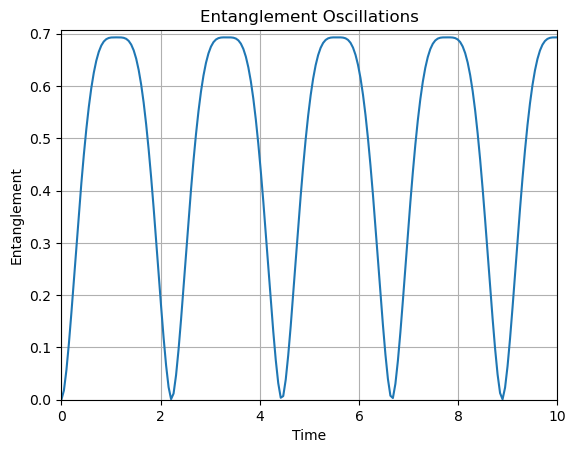

In [151]:
# JCM Entanglement Calculation verification

# constants
w = 1.0
G = 1.0
N = 2

# step 1: define bases

basis_atom_g = q.basis(2, 0)
basis_atom_e = q.basis(2, 1)

basis_qho_0 = q.basis(N, 0)
basis_qho_1 = q.basis(N, 1)

# Step 2: initial state condition

psi0 = q.tensor(basis_atom_e, basis_qho_0)

# Step 3: define the hamiltonian
a = q.tensor(q.qeye(2), q.destroy(N))
adag = a.dag()
s_z = q.tensor(q.sigmaz(), q.qeye(N))
s_lower = q.tensor(q.destroy(2), q.qeye(N))  # When I use sigmam(), it doesn't work. Why? Even the example notebook in docs for qutip uses destroy(2) for JCM
s_raise = s_lower.dag()

H = 0.5 * w * s_z + w * (adag * a + 0.5) + G * (adag * s_lower + a * s_raise)


# Step 4: evolve initial state

times = np.linspace(0.0, 10.0, 200)

result = q.mesolve(H, psi0, times, options=q.Options(store_states=True))

# Step 6: trace over density matrices (ptrace automatically converts to dm, so don't need to do this step)

atom_subsys = [dm.ptrace(0) for dm in result.states]
type(atom_subsys[0])

# Step 7: Compute entanglement measures
vne = [q.entropy_vn(dm) for dm in atom_subsys]

# Step 7: Plot
plt.plot(times, vne)
plt.xlabel("Time")
plt.ylabel("Entanglement")
plt.title("Entanglement Oscillations")
plt.ylim(0, max(vne) + max(vne)/50)
plt.xlim(times.min(), times.max())
plt.grid(True)
plt.show()

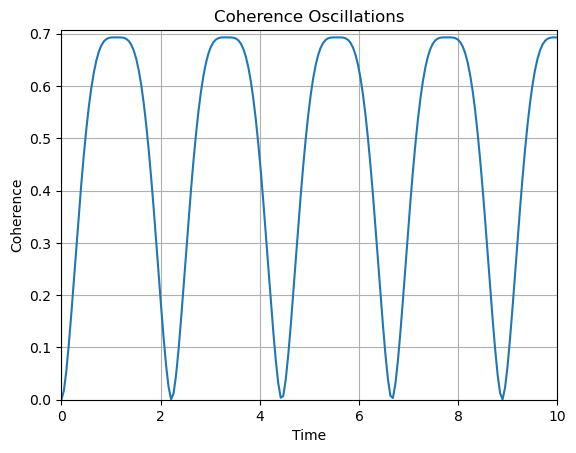

In [153]:
# Calculating Rel. Ent. Coherence
coherence = []
for ket in result.states:
    # Step 1: Convert kets into density matrices
    dm = q.ket2dm(ket)

    # Step 2: Create density matrix of diagonal elements
    diag_element = dm.diag()
    dm_diag = q.Qobj(np.diag(diag_element), dims=dm.dims)

    # Step 3: Calculate entropies
    S_dm_diag = q.entropy_vn(dm_diag)
    S_dm = q.entropy_vn(dm)
    coherence_rel_ent = S_dm_diag - S_dm 
    coherence.append(coherence_rel_ent)

plt.plot(times, coherence)
plt.xlabel("Time")
plt.ylabel("Coherence")
plt.title("Coherence Oscillations")
plt.ylim(0, max(coherence) + max(coherence)/50)
plt.xlim(times.min(), times.max())
plt.grid(True)
plt.show()


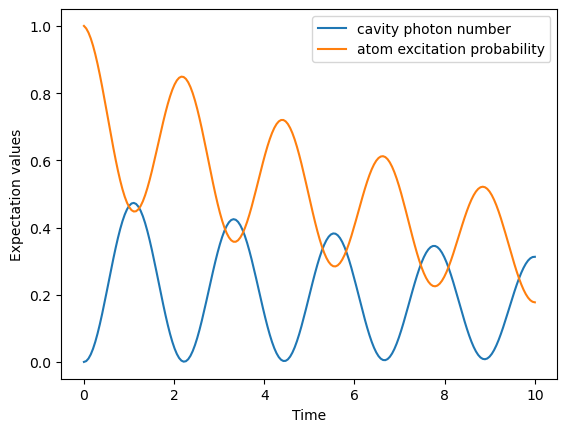

In [ ]:
# OQS Evolution atomic decay via spontaneous emission jump operator

# constants
w = 1.0
G = 1.0
g = np.sqrt(0.1)
N = 2

# step 1: define bases

basis_atom_g = q.basis(2, 0)
basis_atom_e = q.basis(2, 1)

basis_qho_0 = q.basis(N, 0)
basis_qho_1 = q.basis(N, 1)

# Step 2: initial state condition

psi0 = q.tensor(basis_atom_e, basis_qho_0)

# Step 3: define the hamiltonian
a = q.tensor(q.qeye(2), q.destroy(N))
adag = a.dag()
s_z = q.tensor(q.sigmaz(), q.qeye(N))
# same here for s_lower...
s_lower = q.tensor(q.destroy(2), q.qeye(N))

s_raise = s_lower.dag()

H = 0.5 * w * s_z + w * (adag * a + 0.5) + G * (adag * s_lower + a * s_raise)

# Step 4: define the jump superop

L = g * s_lower


# Step 5: evolve initial state

times = np.linspace(0.0, 10.0, 200)

result = q.mesolve(H, psi0, times, [L], e_ops=[adag * a, s_raise * s_lower])

# Step 6: Plot initial state

plt.figure()
plt.plot(times, result.expect[0])
plt.plot(times, result.expect[1])
plt.xlabel("Time")
plt.ylabel("Expectation values")
plt.legend(("cavity photon number", "atom excitation probability"))
plt.show()
